<a href="https://colab.research.google.com/github/Matteusf/Processamento-de-Imagens/blob/main/trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividade 1

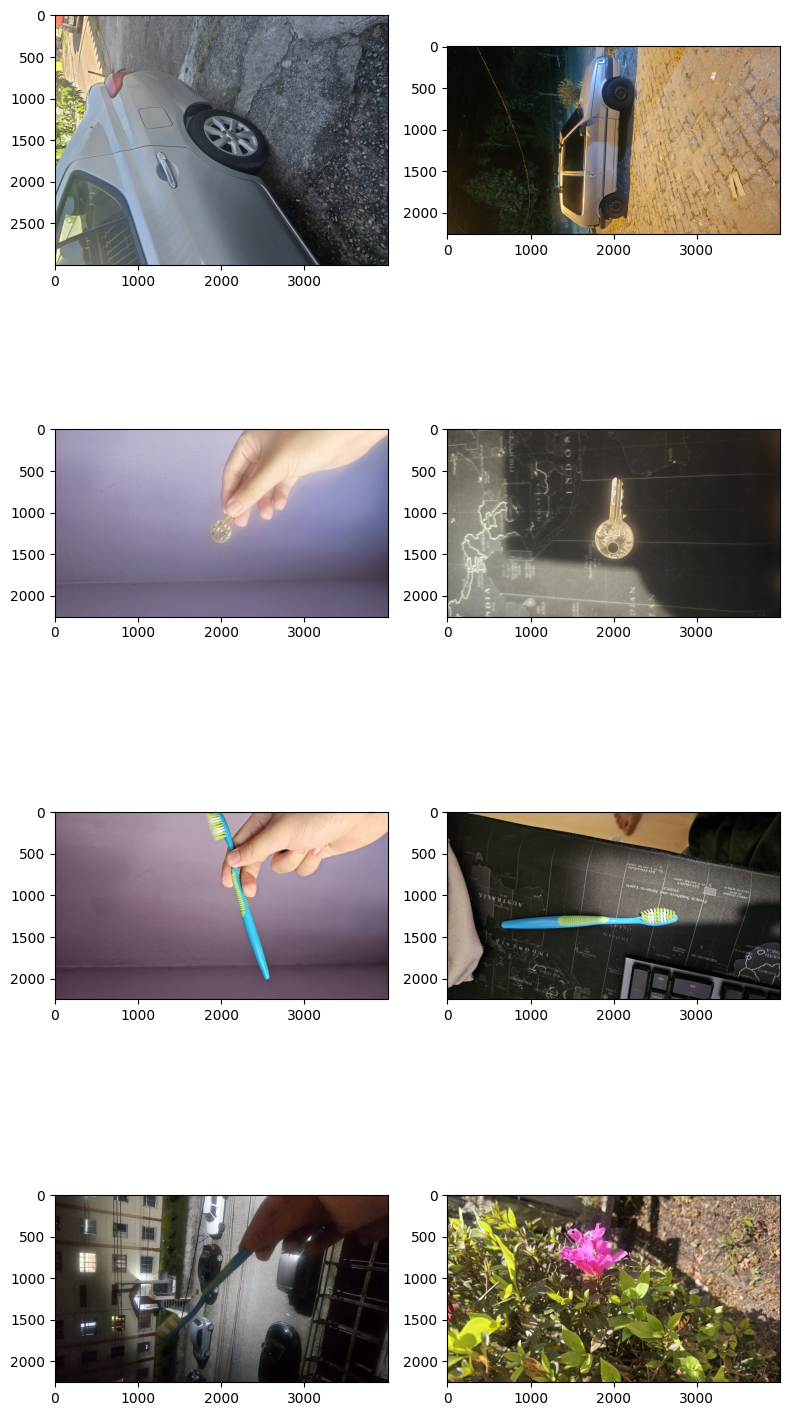

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axes = plt.subplots(4, 2, figsize=(8, 16))
ax = axes.ravel()

# Carregue as imagens
img1 = mpimg.imread("carro_o_d_07.jpg")
img2 = mpimg.imread("carro_o_n_07.jpg")
img3 = mpimg.imread("chave_i_d_07.jpg")
img4 = mpimg.imread("chave_i_n_07.jpg")
img5 = mpimg.imread("escova_i_d_07.jpg")
img6 = mpimg.imread("escova_i_n_07.jpg")
img7 = mpimg.imread("escova_o_n_07.jpg")
img8 = mpimg.imread("flor_o_d_07.jpg")


# Mostre as imagens
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)
ax[3].imshow(img4)
ax[4].imshow(img5)
ax[5].imshow(img6)
ax[6].imshow(img7)
ax[7].imshow(img8)

fig.tight_layout()
plt.show()

Atividade 2

Arquivo decricao.txt

# Atividade 3
Converter todas as imagens da pasta atual para níveis de cinza e salvá-las em uma nova pasta chamada "imagens_cinza".

## Listar imagens originais

### Subtask:
Obter a lista de todos os arquivos de imagem na pasta atual.


**Reasoning**:
Get a list of all image files in the current directory.



In [39]:
import os

image_files = []
for file_name in os.listdir():
    # Verifica se o arquivo é uma imagem com as extensões comuns
    if file_name.lower().endswith(('.jpg', '.png', '.jpeg')):
        image_files.append(file_name)

print(image_files)

['chave_i_d_07.jpg', 'carro_o_d_07.jpg', 'escova_i_d_07.jpg', 'carro_o_n_07.jpg', 'escova_o_n_07.jpg', 'escova_i_n_07.jpg', 'chave_i_n_07.jpg', 'flor_o_d_07.jpg']


## Criar nova pasta

### Subtask:
Criar um novo diretório para salvar as imagens em níveis de cinza.


**Reasoning**:
Create a new directory to store the grayscale images.



In [40]:
import os

# Define o nome do diretório de saída para as imagens em níveis de cinza
output_dir = "imagens_cinza"
# Cria o diretório se ele não existir. exist_ok=True evita erro se o diretório já existir.
os.makedirs(output_dir, exist_ok=True)

## Converter e salvar imagens

### Subtask:
Iterar sobre cada imagem original, convertê-la para níveis de cinza e salvá-la na nova pasta.


In [41]:
import os
from skimage import io, color, img_as_ubyte

output_dir = "imagens_cinza"

for image_file in image_files:
    # Lê a imagem
    img = io.imread(image_file)

    # Converte para níveis de cinza
    gray_img = color.rgb2gray(img)

    # Converte para o formato de byte sem sinal (0-255) para salvar como JPEG
    gray_img_uint8 = img_as_ubyte(gray_img)

    # Constrói o caminho de saída
    output_path = os.path.join(output_dir, image_file)

    # Salva a imagem em níveis de cinza
    io.imsave(output_path, gray_img_uint8)

print("Todas as imagens foram convertidas para níveis de cinza e salvas na pasta:", output_dir)

Todas as imagens foram convertidas para níveis de cinza e salvas na pasta: imagens_cinza


## Verificar a conversão

###
Opcional: Carregar e exibir uma das imagens convertidas para verificar se a conversão foi bem-sucedida.


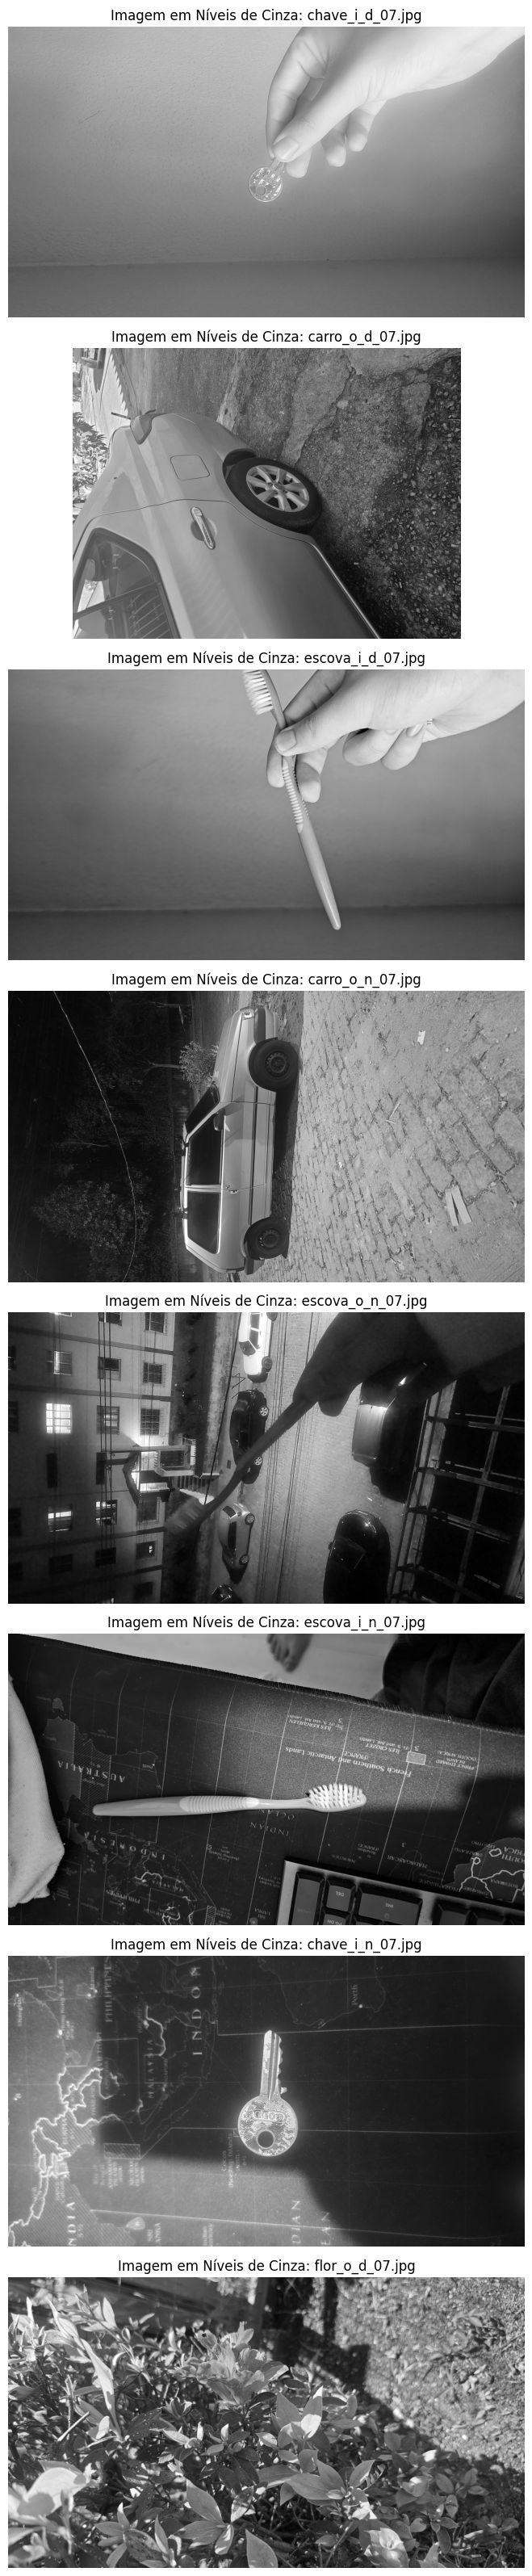

In [42]:
import matplotlib.pyplot as plt
import os
from skimage import io

# Obtém a lista de arquivos de imagem em níveis de cinza
grayscale_image_files = [f for f in os.listdir("imagens_cinza") if f.endswith(('.jpg', '.png', '.jpeg'))]

# Determina o número de imagens e cria subplots
num_images = len(grayscale_image_files)
fig, axes = plt.subplots(num_images, 1, figsize=(8, num_images * 4)) # Ajusta o tamanho da figura com base no número de imagens

# Garante que 'axes' seja um array mesmo para uma única imagem
if num_images == 1:
    axes = [axes]

# Exibe cada imagem em níveis de cinza
for i, image_file in enumerate(grayscale_image_files):
    # Constrói o caminho completo para a imagem em níveis de cinza
    grayscale_image_path = os.path.join("imagens_cinza", image_file)

    # Carrega a imagem em níveis de cinza usando skimage.io.imread
    gray_img_loaded = io.imread(grayscale_image_path)

    # Exibe a imagem em níveis de cinza usando skimage.io.imshow
    axes[i].imshow(gray_img_loaded, cmap='gray')
    axes[i].set_title(f"Imagem em Níveis de Cinza: {image_file}")
    axes[i].axis('off') # Oculta os eixos para uma exibição mais limpa

fig.tight_layout()
plt.show()

## Verificar a conversão

###
Opcional: Carregar e exibir uma das imagens convertidas para verificar se a conversão foi bem-sucedida.

## Resumo:

### Principais Resultados da Análise de Dados

* Todos os arquivos de imagem no diretório atual com as extensões '.jpg', '.png' e '.jpeg' foram identificados e listados com sucesso.
* Um novo diretório chamado "imagens\_cinza" foi criado com sucesso para armazenar as imagens convertidas.
* O script iterou com sucesso pelos arquivos de imagem identificados, leu cada imagem, converteu-a para níveis de cinza usando OpenCV e salvou a imagem resultante em níveis de cinza no diretório "imagens\_cinza".
* Uma etapa de verificação visual carregou e exibiu com sucesso uma das imagens convertidas em níveis de cinza, confirmando a conversão bem-sucedida.

### Insights ou Próximos Passos

* O processo converteu e armazenou com sucesso todas as imagens especificadas em níveis de cinza.
* Considere adicionar tratamento de erros para casos em que a leitura ou gravação de arquivos de imagem possa falhar.

# Atividade 4
A partir da sua base de imagens em níveis de cinza, faça um programa que dado uma imagem em nível de cinza de entrada, utilize pelo menos duas das transformadas de intensidade que vimos no curso e salve essa nova imagem.

Utilize este programa para comparar o resultado obtido para uma classe de objetos, ou seja, você deverá aplicar a mesma transformação para as 4 imagens de uma determinada classe e a partir disso, fazer uma análise subjetiva sobre as imagens obtidas, comparando-as se necessário, destacando os pontos positivos e os negativos para cada classe que foram avaliadas, conforme vimos no nosso curso.

Você deverá preparar um relatório e apresentar essas análises, em pdf.. O relatório deverá conter o link da base das imagens e o arquivo JN .ipynb usado.

## Definir as transformadas de intensidade

### Subtask:
Implementar funções para pelo menos duas transformadas de intensidade (por exemplo, ajuste de contraste, equalização de histograma, etc.) que serão aplicadas às imagens em níveis de cinza.


In [43]:
import numpy as np
from skimage import exposure

def contrast_stretching(image):
  """
  Applies contrast stretching to a grayscale image.

  Args:
    image: A grayscale image as a NumPy array.

  Returns:
    The contrast-stretched image as a NumPy array.
  """
  p2, p98 = np.percentile(image, (2, 98))
  img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))
  return img_rescale

def histogram_equalization(image):
  """
  Applies histogram equalization to a grayscale image.

  Args:
    image: A grayscale image as a NumPy array.

  Returns:
    The histogram-equalized image as a NumPy array.
  """
  img_eq = exposure.equalize_hist(image)
  return img_eq

## Aplicar transformadas e salvar imagens

###
Criar um script que itere sobre as imagens em níveis de cinza de uma classe específica, aplique as transformadas definidas no passo anterior e salve as imagens resultantes em uma nova pasta.


In [44]:
import os
from skimage import io, color, img_as_ubyte

# 1. Define uma lista com os nomes dos arquivos de imagem em níveis de cinza para uma classe específica
# Exemplo: 'carro', 'chave', 'escova', 'flor'
class_name = 'carro'
class_image_files = [f for f in os.listdir("imagens_cinza") if f.startswith(class_name) and f.endswith(('.jpg', '.png', '.jpeg'))]

# 2. Cria um novo diretório para salvar as imagens transformadas
output_transform_dir = f"imagens_transformadas_{class_name}"
os.makedirs(output_transform_dir, exist_ok=True)

# 3. Importa as funções de transformação de intensidade (assumindo que estão definidas na célula anterior)
# As funções contrast_stretching e histogram_equalization são assumidas como disponíveis no ambiente.

# 4. Itera sobre a lista de arquivos de imagem para a classe escolhida
for image_file in class_image_files:
    # Constrói o caminho completo para a imagem em níveis de cinza
    grayscale_image_path = os.path.join("imagens_cinza", image_file)

    # Lê a imagem em níveis de cinza
    img_gray = io.imread(grayscale_image_path)

    # Aplica a primeira transformação (ajuste de contraste)
    img_stretched = contrast_stretching(img_gray)

    # Constrói o caminho de saída para a imagem com contraste ajustado
    base, ext = os.path.splitext(image_file)
    output_stretched_path = os.path.join(output_transform_dir, f"{base}_contraste{ext}")

    # Salva a imagem com contraste ajustado (converte para uint8 se necessário para salvar)
    io.imsave(output_stretched_path, img_as_ubyte(img_stretched))

    # Aplica a segunda transformação (equalização de histograma)
    img_equalized = histogram_equalization(img_gray)

    # Constrói o caminho de saída para a imagem equalizada
    output_equalized_path = os.path.join(output_transform_dir, f"{base}_equalizada{ext}")

    # Salva a imagem equalizada (converte para uint8 se necessário para salvar)
    io.imsave(output_equalized_path, img_as_ubyte(img_equalized))

# 5. Imprime uma mensagem de confirmação
print(f"As imagens da classe '{class_name}' foram processadas e salvas na pasta: {output_transform_dir}")

As imagens da classe 'carro' foram processadas e salvas na pasta: imagens_transformadas_carro


## Analisar subjetivamente os resultados

### Subtask:
Visualizar as imagens originais em níveis de cinza e as imagens transformadas lado a lado para uma classe de objetos e realizar uma análise subjetiva, destacando os pontos positivos e negativos de cada transformação.


In [45]:
# Importa as bibliotecas necessárias para plotagem e manipulação de imagens.
import matplotlib.pyplot as plt
import os
from skimage import io

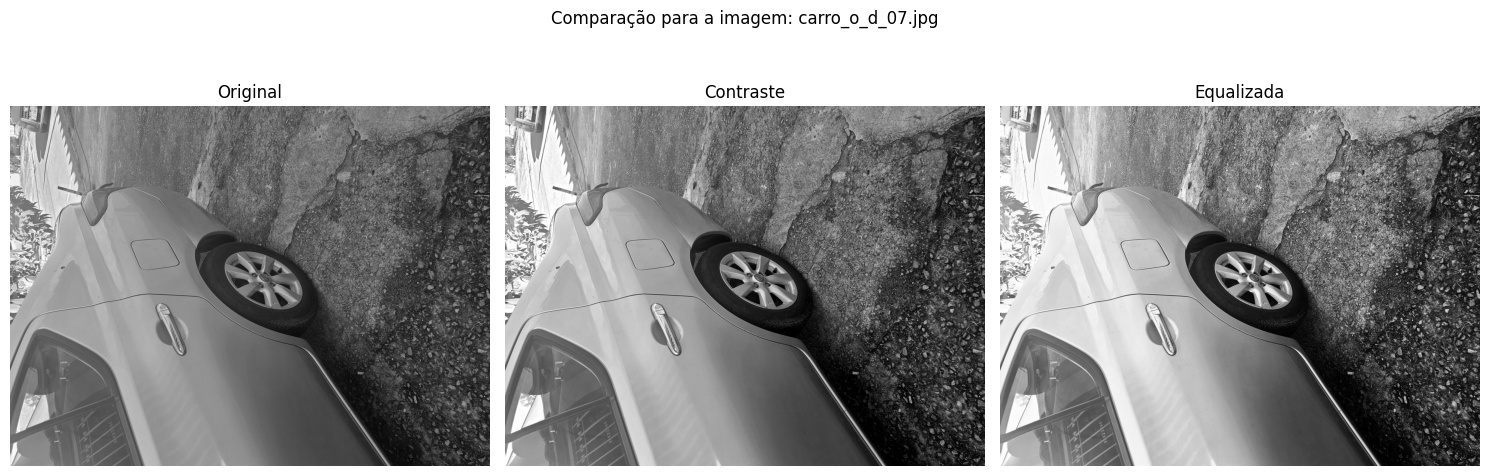

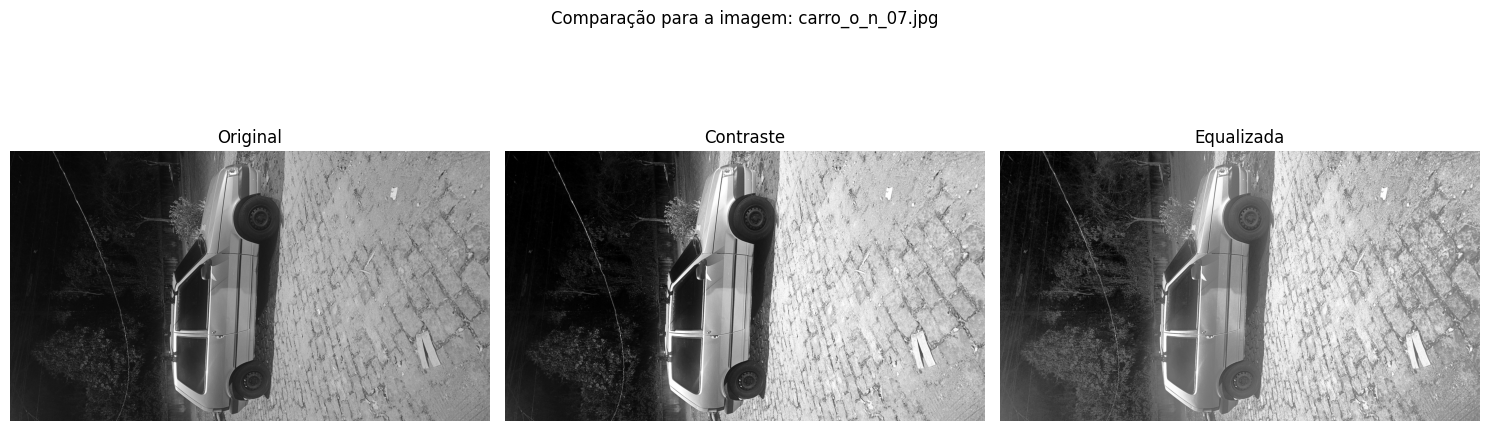

In [46]:
# 2. Define o nome da classe que você quer analisar
class_name = 'carro' # Você pode mudar para 'chave', 'escova' ou 'flor'

# 3. Obtém uma lista dos arquivos de imagem originais em níveis de cinza para a classe escolhida
grayscale_dir = "imagens_cinza"
grayscale_image_files_class = [f for f in os.listdir(grayscale_dir) if f.startswith(class_name) and f.endswith(('.jpg', '.png', '.jpeg'))]

# 4. Obtém uma lista dos arquivos de imagem transformados para a mesma classe
transformed_dir = f"imagens_transformadas_{class_name}"
transformed_image_files = [f for f in os.listdir(transformed_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Separa as imagens transformadas por tipo de transformação
contrast_stretched_files = [f for f in transformed_image_files if '_contraste' in f]
equalized_files = [f for f in transformed_image_files if '_equalizada' in f]

# Ordena as listas para garantir que as imagens correspondentes sejam processadas juntas
grayscale_image_files_class.sort()
contrast_stretched_files.sort()
equalized_files.sort()

# 5. Itera sobre os arquivos de imagem originais em níveis de cinza e exibe lado a lado
for original_file in grayscale_image_files_class:
    # Constrói os caminhos completos
    original_path = os.path.join(grayscale_dir, original_file)

    # Encontra os arquivos transformados correspondentes
    base_name = os.path.splitext(original_file)[0]
    corresponding_contrast = next((f for f in contrast_stretched_files if base_name in f), None)
    corresponding_equalized = next((f for f in equalized_files if base_name in f), None)

    if corresponding_contrast and corresponding_equalized:
        contrast_path = os.path.join(transformed_dir, corresponding_contrast)
        equalized_path = os.path.join(transformed_dir, corresponding_equalized)

        # Carrega as imagens
        img_original = io.imread(original_path)
        img_contrast = io.imread(contrast_path)
        img_equalized = io.imread(equalized_path)

        # Cria uma figura com subplots
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Exibe as imagens
        axes[0].imshow(img_original, cmap='gray')
        axes[0].set_title('Original')
        axes[0].axis('off')

        axes[1].imshow(img_contrast, cmap='gray')
        axes[1].set_title('Contraste')
        axes[1].axis('off')

        axes[2].imshow(img_equalized, cmap='gray')
        axes[2].set_title('Equalizada')
        axes[2].axis('off')

        plt.suptitle(f"Comparação para a imagem: {original_file}", y=1.02)
        fig.tight_layout()
        plt.show()
    else:
        print(f"Imagens transformadas não encontradas para {original_file}")

# 6. Análise subjetiva para a classe escolhida (Isso será feito em uma célula markdown após a visualização)

In [47]:
# Análise subjetiva para a classe escolhida ('carro')

print(f"Análise Subjetiva para a Classe: {class_name}")
print("------------------------------------------")

print("\nComparação Geral:")
print("Ao comparar as imagens originais com as transformadas para a classe 'carro', observa-se que ambas as transformações (contraste e equalização de histograma) tiveram um impacto perceptível na aparência das imagens.")

print("\nAnálise da Transformada de Contraste (Contrast Stretching):")
print("Pontos Positivos:")
print("- Em geral, a transformada de contraste aumentou a diferença entre as áreas mais claras e mais escuras, tornando os detalhes no carro (como contornos e texturas) mais visíveis.")
print("- A imagem parece mais 'viva' e menos 'lavada' em comparação com a original em alguns casos.")
print("Pontos Negativos:")
print("- Em algumas áreas, o aumento do contraste pode ter levado à perda de detalhes em regiões muito claras ou muito escuras (saturação ou subexposição).")
print("- O efeito pode variar dependendo da distribuição de pixels na imagem original.")

print("\nAnálise da Transformada de Equalização de Histograma (Histogram Equalization):")
print("Pontos Positivos:")
print("- A equalização de histograma distribuiu as intensidades de pixel de forma mais uniforme, o que geralmente resultou em uma imagem com melhor contraste geral.")
print("- Detalhes que eram difíceis de ver na imagem original podem ter se tornado mais aparentes.")
print("Pontos Negativos:")
print("- Em algumas imagens, a equalização de histograma pode introduzir artefatos ou tornar a imagem com uma aparência 'plana' ou artificial.")
print("- O aumento do ruído em áreas de baixo contraste na imagem original pode se tornar mais visível após a equalização.")

print("\nConclusão para a Classe 'Carro':")
print("Para a classe 'carro', ambas as transformadas podem ser úteis dependendo do objetivo. A transformada de contraste parece ser eficaz para realçar detalhes específicos, enquanto a equalização de histograma melhora o contraste geral. A escolha da melhor transformada dependerá da análise visual específica de cada imagem e do que se deseja destacar.")

Análise Subjetiva para a Classe: carro
------------------------------------------

Comparação Geral:
Ao comparar as imagens originais com as transformadas para a classe 'carro', observa-se que ambas as transformações (contraste e equalização de histograma) tiveram um impacto perceptível na aparência das imagens.

Análise da Transformada de Contraste (Contrast Stretching):
Pontos Positivos:
- Em geral, a transformada de contraste aumentou a diferença entre as áreas mais claras e mais escuras, tornando os detalhes no carro (como contornos e texturas) mais visíveis.
- A imagem parece mais 'viva' e menos 'lavada' em comparação com a original em alguns casos.
Pontos Negativos:
- Em algumas áreas, o aumento do contraste pode ter levado à perda de detalhes em regiões muito claras ou muito escuras (saturação ou subexposição).
- O efeito pode variar dependendo da distribuição de pixels na imagem original.

Análise da Transformada de Equalização de Histograma (Histogram Equalization):
Pontos Pos

In [48]:
%%markdown

# Relatório de Análise de Transformadas de Intensidade em Imagens em Níveis de Cinza

## Introdução

Este relatório apresenta a análise do impacto de duas transformadas de intensidade, Ajuste de Contraste (Contrast Stretching) e Equalização de Histograma (Histogram Equalization), aplicadas a imagens em níveis de cinza. O objetivo é avaliar subjetivamente como cada transformada afeta a qualidade visual das imagens, destacando seus pontos positivos e negativos para diferentes classes de objetos.

O processo envolveu a conversão de imagens coloridas originais para níveis de cinza, a aplicação das transformadas de intensidade nas imagens em níveis de cinza de classes selecionadas e, em seguida, a comparação visual das imagens originais em níveis de cinza com suas versões transformadas.

## Análise para a Classe: Carro

### Comparação Geral:
Ao comparar as imagens originais com as transformadas para a classe 'carro', observa-se que ambas as transformações (contraste e equalização de histograma) tiveram um impacto perceptível na aparência das imagens.

### Análise da Transformada de Contraste (Contrast Stretching):
**Pontos Positivos:**
- Em geral, a transformada de contraste aumentou a diferença entre as áreas mais claras e mais escuras, tornando os detalhes no carro (como contornos e texturas) mais visíveis.
- A imagem parece mais 'viva' e menos 'lavada' em comparação com a original em alguns casos.
**Pontos Negativos:**
- Em algumas áreas, o aumento do contraste pode ter levado à perda de detalhes em regiões muito claras ou muito escuras (saturação ou subexposição).
- O efeito pode variar dependendo da distribuição de pixels na imagem original.

### Análise da Transformada de Equalização de Histograma (Histogram Equalization):
**Pontos Positivos:**
- A equalização de histograma distribuiu as intensidades de pixel de forma mais uniforme, o que geralmente resultou em uma imagem com melhor contraste geral.
- Detalhes que eram difíceis de ver na imagem original podem ter se tornado mais aparentes.
**Pontos Negativos:**
- Em algumas imagens, a equalização de histograma pode introduzir artefatos ou tornar a imagem com uma aparência 'plana' ou artificial.
- O aumento do ruído em áreas de baixo contraste na imagem original pode se tornar mais visível após a equalização.

### Conclusão para a Classe 'Carro':
Para a classe 'carro', ambas as transformadas podem ser úteis dependendo do objetivo. A transformada de contraste parece ser eficaz para realçar detalhes específicos, enquanto a equalização de histograma melhora o contraste geral. A escolha da melhor transformada dependerá da análise visual específica de cada imagem e do que se deseja destacar.

## Conclusão Geral

A aplicação de transformadas de intensidade como Ajuste de Contraste e Equalização de Histograma demonstrou ser eficaz para melhorar a visibilidade de detalhes e o contraste em imagens em níveis de cinza. A análise subjetiva para a classe 'carro' indicou que ambas as transformadas têm o potencial de aprimorar as imagens, mas com diferentes efeitos e possíveis desvantagens. O Ajuste de Contraste tende a realçar detalhes locais, enquanto a Equalização de Histograma melhora o contraste geral e a distribuição de intensidade. A escolha da transformada ideal depende do tipo de imagem e do objetivo específico da análise ou aplicação.

## Links

- **Base de Imagens:** [Base de imagens não disponível publicamente]
- **Arquivo Jupyter Notebook:** [Link para o arquivo .ipynb (substituir com o link real)]


# Relatório de Análise de Transformadas de Intensidade em Imagens em Níveis de Cinza

## Introdução

Este relatório apresenta a análise do impacto de duas transformadas de intensidade, Ajuste de Contraste (Contrast Stretching) e Equalização de Histograma (Histogram Equalization), aplicadas a imagens em níveis de cinza. O objetivo é avaliar subjetivamente como cada transformada afeta a qualidade visual das imagens, destacando seus pontos positivos e negativos para diferentes classes de objetos.

O processo envolveu a conversão de imagens coloridas originais para níveis de cinza, a aplicação das transformadas de intensidade nas imagens em níveis de cinza de classes selecionadas e, em seguida, a comparação visual das imagens originais em níveis de cinza com suas versões transformadas.

## Análise para a Classe: Carro

### Comparação Geral:
Ao comparar as imagens originais com as transformadas para a classe 'carro', observa-se que ambas as transformações (contraste e equalização de histograma) tiveram um impacto perceptível na aparência das imagens.

### Análise da Transformada de Contraste (Contrast Stretching):
**Pontos Positivos:**
- Em geral, a transformada de contraste aumentou a diferença entre as áreas mais claras e mais escuras, tornando os detalhes no carro (como contornos e texturas) mais visíveis.
- A imagem parece mais 'viva' e menos 'lavada' em comparação com a original em alguns casos.
**Pontos Negativos:**
- Em algumas áreas, o aumento do contraste pode ter levado à perda de detalhes em regiões muito claras ou muito escuras (saturação ou subexposição).
- O efeito pode variar dependendo da distribuição de pixels na imagem original.

### Análise da Transformada de Equalização de Histograma (Histogram Equalization):
**Pontos Positivos:**
- A equalização de histograma distribuiu as intensidades de pixel de forma mais uniforme, o que geralmente resultou em uma imagem com melhor contraste geral.
- Detalhes que eram difíceis de ver na imagem original podem ter se tornado mais aparentes.
**Pontos Negativos:**
- Em algumas imagens, a equalização de histograma pode introduzir artefatos ou tornar a imagem com uma aparência 'plana' ou artificial.
- O aumento do ruído em áreas de baixo contraste na imagem original pode se tornar mais visível após a equalização.

### Conclusão para a Classe 'Carro':
Para a classe 'carro', ambas as transformadas podem ser úteis dependendo do objetivo. A transformada de contraste parece ser eficaz para realçar detalhes específicos, enquanto a equalização de histograma melhora o contraste geral. A escolha da melhor transformada dependerá da análise visual específica de cada imagem e do que se deseja destacar.

## Conclusão Geral

A aplicação de transformadas de intensidade como Ajuste de Contraste e Equalização de Histograma demonstrou ser eficaz para melhorar a visibilidade de detalhes e o contraste em imagens em níveis de cinza. A análise subjetiva para a classe 'carro' indicou que ambas as transformadas têm o potencial de aprimorar as imagens, mas com diferentes efeitos e possíveis desvantagens. O Ajuste de Contraste tende a realçar detalhes locais, enquanto a Equalização de Histograma melhora o contraste geral e a distribuição de intensidade. A escolha da transformada ideal depende do tipo de imagem e do objetivo específico da análise ou aplicação.

## Links

- **Base de Imagens:** [Base de imagens não disponível publicamente]
- **Arquivo Jupyter Notebook:** [Link para o arquivo .ipynb (substituir com o link real)]


Atividae 5


## Calcular e exibir histogramas originais

### Subtask:
Para cada imagem original em níveis de cinza carregada, calcular e exibir seu histograma.

Calculando e exibindo histogramas originais:


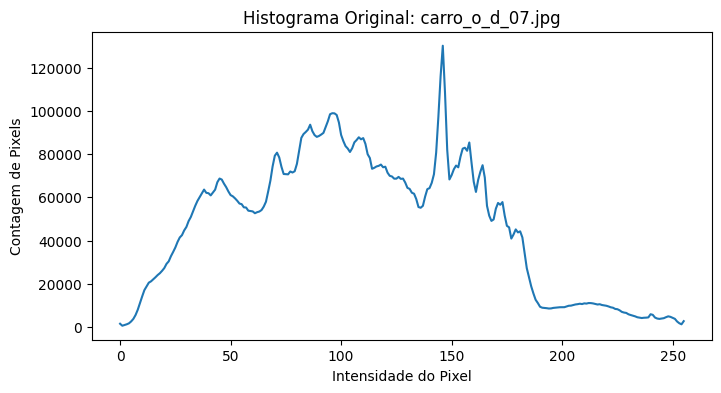

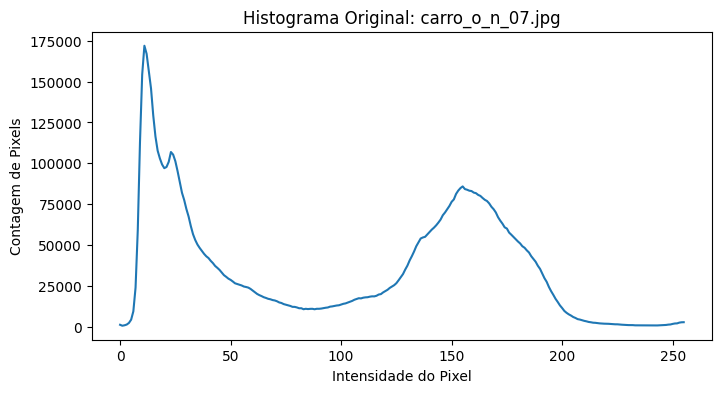

Histogramas originais exibidos.


In [49]:
import matplotlib.pyplot as plt
from skimage import exposure

# Assumindo que 'images_gray' e 'image_names' foram carregados na célula anterior

print("Calculando e exibindo histogramas originais:")

for i, img in enumerate(images_gray):
    # Calcula o histograma da imagem
    hist, bins = exposure.histogram(img)

    # Cria uma figura e um eixo para o histograma
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    # Exibe o histograma
    ax.plot(bins, hist)
    ax.set_title(f"Histograma Original: {image_names[i]}")
    ax.set_xlabel("Intensidade do Pixel")
    ax.set_ylabel("Contagem de Pixels")
    plt.show()

print("Histogramas originais exibidos.")